# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [10]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [25]:
 """
    Build your own model
    """
    
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128,64,32]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i ,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
       
    return model

In [53]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.1,0.01,0.001,0.0001,0.00001]
RHO = 0.9
BATCH_SIZE = 256
#MOMENTUM = 0.2
EPOCHS = 50

In [62]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()    
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['acc'])
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 7s 146us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 145us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64) 

Epoch 48/50
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dens

50000/50000 [==============================] - 7s 141us/step - loss: 0.8542 - acc: 0.6913 - val_loss: 1.7518 - val_acc: 0.4850
Epoch 48/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8449 - acc: 0.6951 - val_loss: 1.8210 - val_acc: 0.4829
Epoch 49/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8251 - acc: 0.7012 - val_loss: 1.8609 - val_acc: 0.4959
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8192 - acc: 0.7053 - val_loss: 1.9663 - val_acc: 0.4689
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (

50000/50000 [==============================] - 7s 141us/step - loss: 1.0714 - acc: 0.6229 - val_loss: 1.3587 - val_acc: 0.5225
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.0623 - acc: 0.6272 - val_loss: 1.4080 - val_acc: 0.5090
Epoch 48/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.0513 - acc: 0.6326 - val_loss: 1.5674 - val_acc: 0.4760
Epoch 49/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.0388 - acc: 0.6349 - val_loss: 1.4530 - val_acc: 0.5016
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.0298 - acc: 0.6381 - val_loss: 1.5140 - val_acc: 0.4908
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)  

50000/50000 [==============================] - 7s 142us/step - loss: 1.4754 - acc: 0.4852 - val_loss: 1.5135 - val_acc: 0.4696
Epoch 46/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.4699 - acc: 0.4871 - val_loss: 1.5078 - val_acc: 0.4706
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4661 - acc: 0.4889 - val_loss: 1.5179 - val_acc: 0.4633
Epoch 48/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.4618 - acc: 0.4892 - val_loss: 1.5300 - val_acc: 0.4604
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.4565 - acc: 0.4924 - val_loss: 1.5015 - val_acc: 0.4705
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4524 - acc: 0.4920 - val_loss: 1.5145 - val_acc: 0.4669


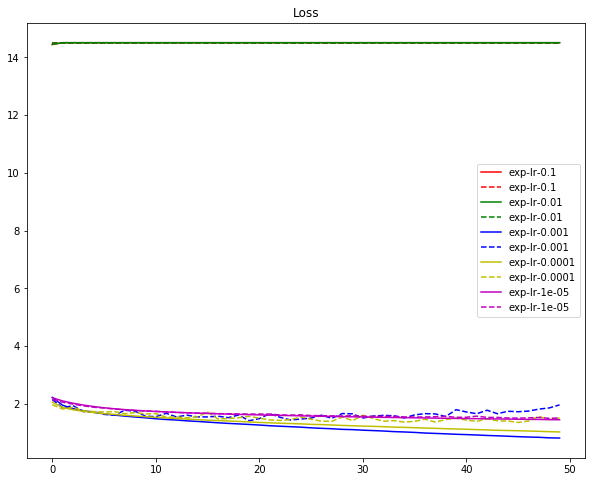

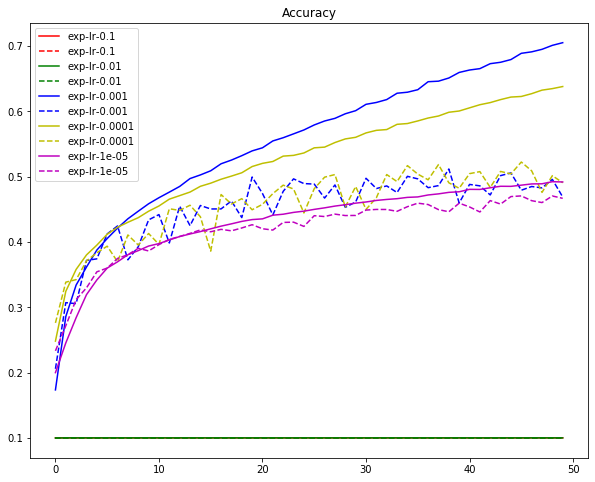

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(10,8))
for i,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'],'-',label=cond,color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'],'--',label=cond,color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()



plt.figure(figsize=(10,8))
for i,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'],'-',label=cond,color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'],'--',label=cond,color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()    

In [64]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.1,0.01,0.001,0.0001,0.00001]
RHO = 0.9
BATCH_SIZE = 256
#MOMENTUM = 0.2
EPOCHS = 50

In [65]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()    
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['acc'])
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64) 

50000/50000 [==============================] - 7s 131us/step - loss: 1.1101 - acc: 0.6095 - val_loss: 1.4400 - val_acc: 0.5063
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.1034 - acc: 0.6112 - val_loss: 1.4116 - val_acc: 0.5101
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.0951 - acc: 0.6151 - val_loss: 1.4231 - val_acc: 0.5102
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 1

50000/50000 [==============================] - 7s 137us/step - loss: 1.2924 - acc: 0.5482 - val_loss: 1.3915 - val_acc: 0.5080
Epoch 48/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2877 - acc: 0.5487 - val_loss: 1.3953 - val_acc: 0.5081
Epoch 49/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2849 - acc: 0.5492 - val_loss: 1.3986 - val_acc: 0.5071
Epoch 50/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.2815 - acc: 0.5508 - val_loss: 1.4004 - val_acc: 0.5016
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (

50000/50000 [==============================] - 7s 131us/step - loss: 1.7144 - acc: 0.4001 - val_loss: 1.7222 - val_acc: 0.3970
Epoch 47/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7123 - acc: 0.4008 - val_loss: 1.7203 - val_acc: 0.3981
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7101 - acc: 0.4014 - val_loss: 1.7182 - val_acc: 0.3991
Epoch 49/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.7082 - acc: 0.4027 - val_loss: 1.7163 - val_acc: 0.3973
Epoch 50/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7063 - acc: 0.4030 - val_loss: 1.7154 - val_acc: 0.3993
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)  

50000/50000 [==============================] - 7s 131us/step - loss: 2.1393 - acc: 0.2341 - val_loss: 2.1365 - val_acc: 0.2407
Epoch 46/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1380 - acc: 0.2344 - val_loss: 2.1352 - val_acc: 0.2405
Epoch 47/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1368 - acc: 0.2348 - val_loss: 2.1340 - val_acc: 0.2404
Epoch 48/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1356 - acc: 0.2351 - val_loss: 2.1328 - val_acc: 0.2407
Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.1344 - acc: 0.2352 - val_loss: 2.1316 - val_acc: 0.2405
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.1332 - acc: 0.2352 - val_loss: 2.1304 - val_acc: 0.2405


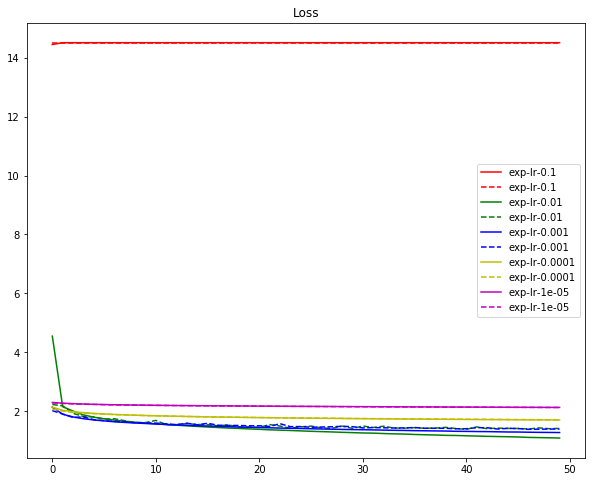

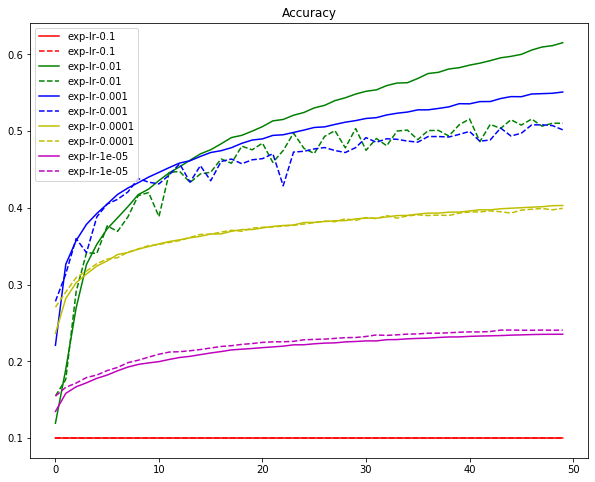

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(10,8))
for i,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'],'-',label=cond,color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'],'--',label=cond,color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()



plt.figure(figsize=(10,8))
for i,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'],'-',label=cond,color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'],'--',label=cond,color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()    